<a href="https://colab.research.google.com/github/virajvaidya/ValueAtRiskModel/blob/main/AUSFINCVAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import datetime          as dt
import pandas            as pd
import pandas_datareader as pdr

In [ ]:
!pip install yfinance

from scipy.stats import norm

import yfinance          as yf
import pandas            as pd
import numpy             as np
import datetime          as dt
import matplotlib.pyplot as plt
import seaborn           as sns

import requests


In [97]:
end   = dt.datetime.now()
start = ('2001/01/01')
start, end

('2001/01/01', datetime.datetime(2021, 12, 6, 8, 58, 27, 312707))

In [ ]:
finclist  = ['NAB', 'CBA', 'WBC', 'ANZ','MQG','QBE','ASX','SUN','IAG','MPL','BOQ','BEN','AMP','PPT']
bigfinc   = [i +'.AX' for i in finclist]
bigfinc

In [100]:
df= yf.download(bigfinc)

[*********************100%***********************]  14 of 14 completed


In [95]:
df.head()

Adj Close                          ... Volume                     
              AMP.AX    ANZ.AX ASX.AX BEN.AX  ... PPT.AX QBE.AX SUN.AX WBC.AX
Date                                          ...                            
1988-02-01       NaN  0.469201    NaN    NaN  ...    NaN    0.0    NaN    0.0
1988-02-02       NaN  0.469201    NaN    NaN  ...    NaN    0.0    NaN    0.0
1988-02-03       NaN  0.469201    NaN    NaN  ...    NaN    0.0    NaN    0.0
1988-02-04       NaN  0.469201    NaN    NaN  ...    NaN    0.0    NaN    0.0
1988-02-05       NaN  0.469201    NaN    NaN  ...    NaN    0.0    NaN    0.0

[5 rows x 84 columns]

In [29]:
Close=df.Close

In [36]:
Close.head()

,AMP.AX,ANZ.AX,ASX.AX,BEN.AX,BOQ.AX,CBA.AX,IAG.AX,MPL.AX,MQG.AX,NAB.AX,PPT.AX,QBE.AX,SUN.AX,WBC.AX
Date,,,,,,,,,,,,,,
1988-02-01,NaN,3.205835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.925745,NaN,0.858748,NaN,3.723146
1988-02-02,NaN,3.205835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.925745,NaN,0.858748,NaN,3.723146
1988-02-03,NaN,3.205835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.925745,NaN,0.858748,NaN,3.723146
1988-02-04,NaN,3.205835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.925745,NaN,0.858748,NaN,3.723146
1988-02-05,NaN,3.205835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.925745,NaN,0.858748,NaN,3.723146


In [45]:
Close.describe()

,AMP.AX,ANZ.AX,ASX.AX,BEN.AX,BOQ.AX,CBA.AX,IAG.AX,MPL.AX,MQG.AX,NAB.AX,PPT.AX,QBE.AX,SUN.AX,WBC.AX
count,5806.000000,8534.000000,5826.000000,7267.000000,5668.000000,7653.000000,5433.000000,1783.000000,5848.000000,8533.000000,8074.000000,8539.000000,8423.000000,8533.000000
mean,6.580917,17.227370,36.809362,8.422388,9.832495,43.946356,5.061070,2.853662,61.619216,22.238006,31.927982,10.562640,9.319697,17.259471
std,3.588558,9.749449,21.217677,3.316147,3.067903,26.513628,1.475405,0.374382,38.591994,9.571868,20.090238,7.291454,5.113959,9.945711
min,0.920000,2.656012,8.614375,2.623719,4.466409,5.865721,2.438524,1.990000,15.489008,3.925745,4.300000,0.858748,1.251773,2.721472
25%,4.540000,6.315194,16.519911,5.796012,7.259397,24.109375,3.709016,2.600000,31.354177,12.252518,10.700000,4.783680,4.248384,6.158075
50%,5.500000,17.950001,34.063702,8.990000,9.715065,40.878521,5.153688,2.860000,49.009190,24.638218,34.000000,10.160000,9.435789,17.160000
75%,8.686835,26.100000,48.043602,10.826469,12.030000,70.657181,6.065573,3.110000,81.939487,29.469999,44.799999,13.550000,13.330000,25.520000
max,16.916386,37.189999,94.760002,17.791132,18.346272,110.129997,8.862704,3.670000,208.000000,42.655506,84.199997,35.189999,21.232805,39.620266


In [89]:
sns.set_style('whitegrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(20, 10))

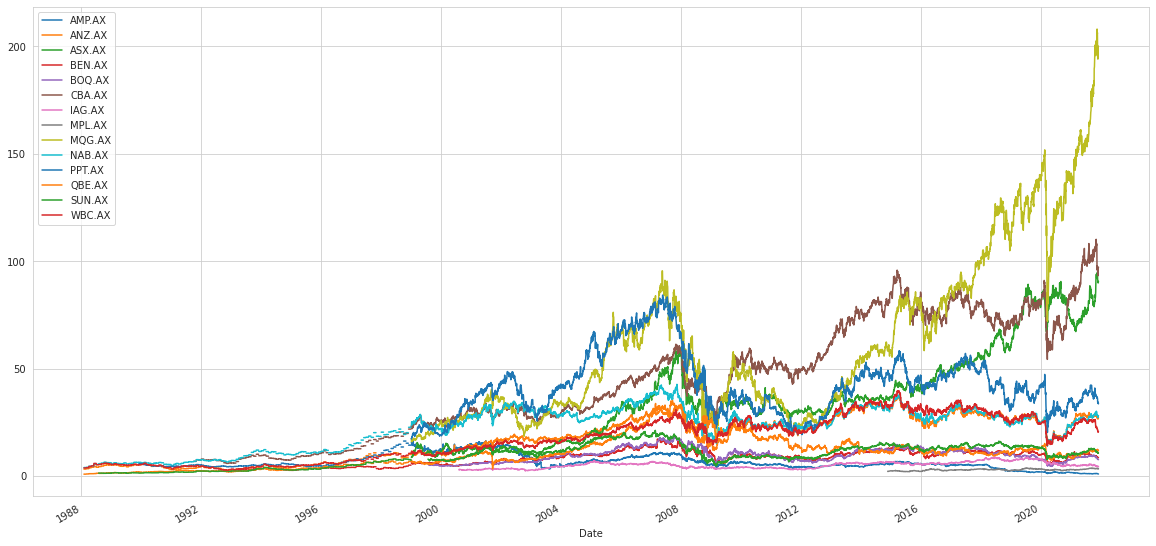

In [90]:
Close.plot()

In [105]:
returns=Close.pct_change()

In [106]:
returns.tail()

,AMP.AX,ANZ.AX,ASX.AX,BEN.AX,BOQ.AX,CBA.AX,IAG.AX,MPL.AX,MQG.AX,NAB.AX,PPT.AX,QBE.AX,SUN.AX,WBC.AX
Date,,,,,,,,,,,,,,
2021-11-30,0.029851,0.003005,-0.006482,-0.001166,-0.015464,-0.006398,0.013730,0.026786,0.014071,0.003676,0.003801,0.001724,0.015962,-0.019120
2021-12-01,-0.053140,-0.002247,-0.000663,0.000000,0.000000,0.007512,-0.002257,-0.014493,-0.005337,0.002930,-0.011652,0.010327,-0.009242,0.004873
2021-12-02,-0.040816,0.001877,-0.005975,-0.009335,-0.002618,0.021517,-0.004525,-0.011765,0.014666,0.008035,-0.006779,-0.004259,0.001866,-0.007760
2021-12-03,0.005319,0.012739,0.003340,0.002356,0.001312,0.007404,0.015909,0.008929,0.005741,0.013043,0.015430,0.027374,0.007449,0.011730
2021-12-06,-0.026455,0.000370,0.004327,0.002350,-0.003932,0.006521,-0.038031,-0.005900,0.001703,0.002861,-0.017241,-0.014155,-0.008318,0.000966


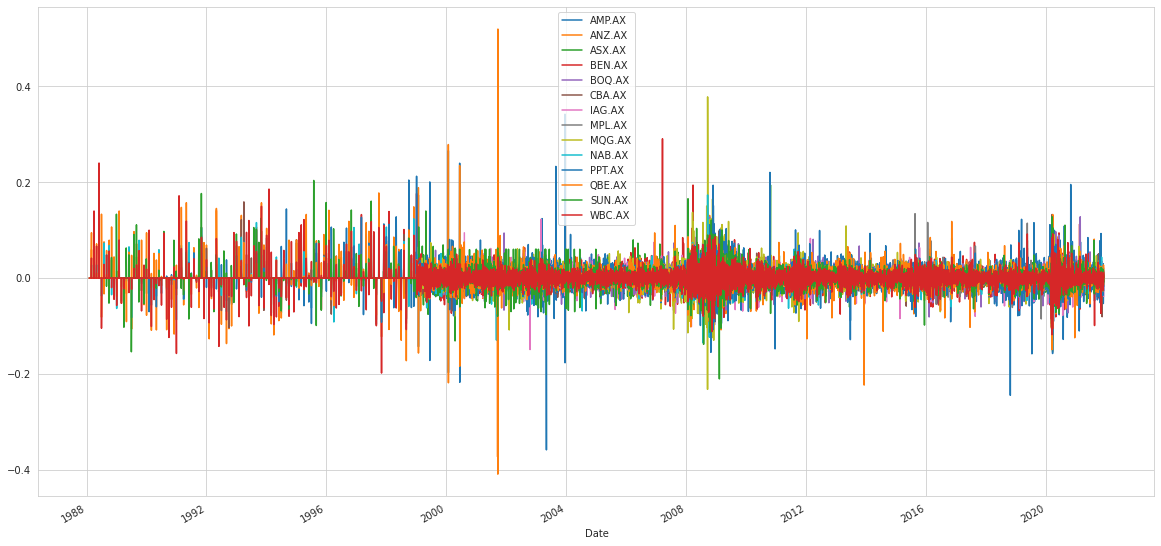

In [107]:
returns.plot()

In [108]:
import numpy as np
weights   = np.array([0.07143, 0.07143, 0.07143, 0.07143, 0.07143, 0.07143,0.07143, 0.07143, 0.07143,0.07143, 0.07143, 0.07143,0.07143, 0.07143])                                      #Allocating equal weights to the stocks in our portfolio
initinv   = 1000000  

In [109]:
cov_matrix = returns.cov()
cov_matrix

,AMP.AX,ANZ.AX,ASX.AX,BEN.AX,BOQ.AX,CBA.AX,IAG.AX,MPL.AX,MQG.AX,NAB.AX,PPT.AX,QBE.AX,SUN.AX,WBC.AX
AMP.AX,0.000479,0.000179,0.000104,0.000132,0.000128,0.000118,0.000117,0.000090,0.000172,0.000134,0.000149,0.000127,0.000144,0.000129
ANZ.AX,0.000179,0.000271,0.000104,0.000122,0.000135,0.000150,0.000106,0.000080,0.000179,0.000162,0.000113,0.000115,0.000096,0.000174
ASX.AX,0.000104,0.000104,0.000239,0.000096,0.000088,0.000089,0.000087,0.000072,0.000143,0.000104,0.000106,0.000092,0.000088,0.000095
BEN.AX,0.000132,0.000122,0.000096,0.000287,0.000157,0.000108,0.000102,0.000070,0.000160,0.000120,0.000124,0.000097,0.000101,0.000113
BOQ.AX,0.000128,0.000135,0.000088,0.000157,0.000288,0.000116,0.000097,0.000068,0.000152,0.000137,0.000134,0.000104,0.000117,0.000129
CBA.AX,0.000118,0.000150,0.000089,0.000108,0.000116,0.000186,0.000094,0.000082,0.000147,0.000139,0.000100,0.000107,0.000088,0.000143
IAG.AX,0.000117,0.000106,0.000087,0.000102,0.000097,0.000094,0.000259,0.000078,0.000122,0.000100,0.000113,0.000119,0.000124,0.000102
MPL.AX,0.000090,0.000080,0.000072,0.000070,0.000068,0.000082,0.000078,0.000228,0.000078,0.000073,0.000081,0.000088,0.000086,0.000071
MQG.AX,0.000172,0.000179,0.000143,0.000160,0.000152,0.000147,0.000122,0.000078,0.000436,0.000185,0.000178,0.000160,0.000170,0.000160
NAB.AX,0.000134,0.000162,0.000104,0.000120,0.000137,0.000139,0.000100,0.000073,0.000185,0.000213,0.000104,0.000116,0.000090,0.000155


In [ ]:
avgreturns = returns.mean()
avgreturns

In [111]:
portfoliomean  = avgreturns.dot(weights)                           #Making the returns proportional with the weighting of our portfolio

In [112]:
portfoliostd = np.sqrt(weights.T.dot(cov_matrix).dot(weights))     #Computing the standard deviation of our portfolio after adjusting for weights

In [113]:
invmean        = (1+portfoliomean) * initinv                       #Computing the mean of our investment amount

In [114]:
invstd         = initinv * portfoliostd                            #Computing the standard deviation of our investment

In [115]:
from scipy.stats import norm

In [117]:
conf = 0.05                                                       #Asserting the confidence interval at 95%

In [118]:
confcutoff = norm.ppf(conf, invmean, invstd)                      #Defining the "cutoff" value where our 95% CI sits

In [119]:
var = initinv - confcutoff                                        #Calculating the VaR as Initial Investment value minus the cutoff

In [120]:
var

18320.577097519883

In [122]:
log_returns = np.log(Close/Close.shift())                                                   #Log returns of the 'Close' of the 4 Stocks

In [125]:
n = 5000                                                                              #Running 5000 iterations for the simulation
 
weights = np.zeros((n, 14))
exp_rtns = np.zeros(n)                                                                #Expected Returns
exp_vols = np.zeros(n)                                                                #Expected Volatility
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(14)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [126]:
weights[sharpe_ratios.argmax()]

array([0.01121244, 0.06616769, 0.1643222 , 0.03440173, 0.04890052,
       0.07665988, 0.0141049 , 0.12318764, 0.17699462, 0.07013569,
       0.01573569, 0.03012363, 0.05667001, 0.11138338])